In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [2]:
train = pd.read_csv('train.csv', parse_dates = ['date'])
test = pd.read_csv('test.csv', parse_dates = ['date'])
submissions = pd.read_csv('SampleSubmission.csv')
vd = pd.read_csv('VariableDefinitionsHotspot.csv')

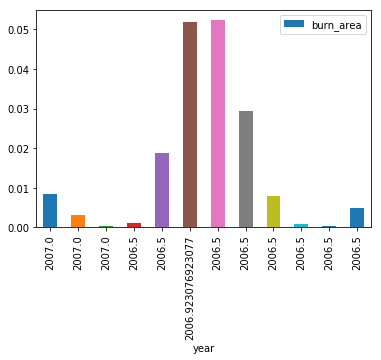

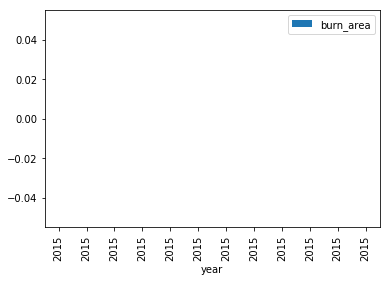

In [3]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

# Date variables
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
test.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

In [4]:
print(train.columns)

train = train.drop(['population_density', 'ID', 'date', 'climate_swe', 'landcover_0',
                    'landcover_1', 'landcover_2', 'landcover_3', 'landcover_5', 'landcover_6',
                    'landcover_7', 'landcover_8'], axis=1)
test = test.drop(['population_density', 'ID', 'burn_area', 'date', 'climate_swe', 'landcover_0','landcover_1', 
                  'landcover_2', 'landcover_3', 'landcover_5', 'landcover_6','landcover_7', 'landcover_8'], axis=1)

Index(['ID', 'area', 'date', 'lat', 'lon', 'burn_area', 'climate_aet',
       'climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr',
       'climate_ro', 'climate_soil', 'climate_srad', 'climate_swe',
       'climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd',
       'climate_vs', 'elevation', 'landcover_0', 'landcover_1', 'landcover_2',
       'landcover_3', 'landcover_4', 'landcover_5', 'landcover_6',
       'landcover_7', 'landcover_8', 'population_density', 'precipitation',
       'month', 'year'],
      dtype='object')


In [5]:
print(train.shape)
print(test.shape)

(626644, 22)
(137556, 21)


In [6]:
Labels = np.array(train['burn_area'])
print(Labels)

[0.00368827 0.         0.         ... 0.         0.         0.        ]


In [7]:
train = train.drop('burn_area', axis=1)

In [8]:
Features = np.array(train)
test_enc = np.array(test)

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :])
Features[:, :] = scaler.transform(Features[:, :])
print(Features[:, :])

[[-1.73159757  0.43753111  1.85451289 ...  0.1322863  -0.75212307
  -1.68075649]
 [-1.73069097  0.49456614  1.85383075 ...  0.04842358 -0.75212307
  -1.68075649]
 [-1.72978438  0.43650345  1.80403446 ...  0.23004017 -0.75212307
  -1.68075649]
 ...
 [ 1.72978438  1.48445787 -2.34861303 ...  1.04469196  1.57520115
   1.60372824]
 [ 1.73069097  1.54174981 -2.34565709 ...  0.77124435  1.57520115
   1.60372824]
 [ 1.73159757  1.5450897  -2.39522601 ...  0.63133742  1.57520115
   1.60372824]]


In [10]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :])
test_enc[:, :] = scaler1.transform(test_enc[:, :])
#print(test_enc[:, :])

In [11]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [12]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [17]:
xg_reg = xgb.XGBRegressor(objective = 'reg:logistic', n_estimators = 400, seed = 123, max_depth = 8,
                           learning_rate=0.1, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_train, y_train), (x_test, y_test)]
xg_reg.fit(x_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 10)

[0]	validation_0-rmse:0.61486	validation_1-rmse:0.61527
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.55214	validation_1-rmse:0.55232
[2]	validation_0-rmse:0.49648	validation_1-rmse:0.49679
[3]	validation_0-rmse:0.44749	validation_1-rmse:0.44749
[4]	validation_0-rmse:0.40357	validation_1-rmse:0.40349
[5]	validation_0-rmse:0.36428	validation_1-rmse:0.36421
[6]	validation_0-rmse:0.32898	validation_1-rmse:0.32894
[7]	validation_0-rmse:0.29734	validation_1-rmse:0.29731
[8]	validation_0-rmse:0.26885	validation_1-rmse:0.26883
[9]	validation_0-rmse:0.24321	validation_1-rmse:0.24330
[10]	validation_0-rmse:0.22037	validation_1-rmse:0.22029
[11]	validation_0-rmse:0.19959	validation_1-rmse:0.19965
[12]	validation_0-rmse:0.18098	validation_1-rmse:0.18105
[13]	validation_0-rmse:0.16437	validation_1-rmse:0.16434
[14]	validation_0-rmse:0.14934	validation_1-rmse:0.14

[141]	validation_0-rmse:0.02438	validation_1-rmse:0.02654
[142]	validation_0-rmse:0.02436	validation_1-rmse:0.02653
[143]	validation_0-rmse:0.02431	validation_1-rmse:0.02648
[144]	validation_0-rmse:0.02425	validation_1-rmse:0.02644
[145]	validation_0-rmse:0.02424	validation_1-rmse:0.02644
[146]	validation_0-rmse:0.02414	validation_1-rmse:0.02636
[147]	validation_0-rmse:0.02391	validation_1-rmse:0.02620
[148]	validation_0-rmse:0.02385	validation_1-rmse:0.02616
[149]	validation_0-rmse:0.02378	validation_1-rmse:0.02611
[150]	validation_0-rmse:0.02372	validation_1-rmse:0.02608
[151]	validation_0-rmse:0.02367	validation_1-rmse:0.02605
[152]	validation_0-rmse:0.02361	validation_1-rmse:0.02601
[153]	validation_0-rmse:0.02356	validation_1-rmse:0.02597
[154]	validation_0-rmse:0.02353	validation_1-rmse:0.02595
[155]	validation_0-rmse:0.02341	validation_1-rmse:0.02586
[156]	validation_0-rmse:0.02339	validation_1-rmse:0.02584
[157]	validation_0-rmse:0.02333	validation_1-rmse:0.02578
[158]	validati

[283]	validation_0-rmse:0.01807	validation_1-rmse:0.02277
[284]	validation_0-rmse:0.01804	validation_1-rmse:0.02276
[285]	validation_0-rmse:0.01803	validation_1-rmse:0.02275
[286]	validation_0-rmse:0.01801	validation_1-rmse:0.02275
[287]	validation_0-rmse:0.01800	validation_1-rmse:0.02274
[288]	validation_0-rmse:0.01798	validation_1-rmse:0.02273
[289]	validation_0-rmse:0.01796	validation_1-rmse:0.02273
[290]	validation_0-rmse:0.01794	validation_1-rmse:0.02271
[291]	validation_0-rmse:0.01791	validation_1-rmse:0.02270
[292]	validation_0-rmse:0.01791	validation_1-rmse:0.02270
[293]	validation_0-rmse:0.01790	validation_1-rmse:0.02269
[294]	validation_0-rmse:0.01789	validation_1-rmse:0.02269
[295]	validation_0-rmse:0.01787	validation_1-rmse:0.02268
[296]	validation_0-rmse:0.01784	validation_1-rmse:0.02267
[297]	validation_0-rmse:0.01779	validation_1-rmse:0.02266
[298]	validation_0-rmse:0.01774	validation_1-rmse:0.02263
[299]	validation_0-rmse:0.01773	validation_1-rmse:0.02263
[300]	validati

XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=400, n_jobs=0, num_parallel_tree=1,
       objective='reg:logistic', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [18]:
preds = xg_reg.predict(test_enc)

In [19]:
submissions.Prediction = preds

In [20]:
submissions.to_csv('HotspotSubmission6.csv', index=False)